# Logistic Regression


## Import data and libraries

In [1]:
 from google.colab import drive
 drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Group Project/depression.csv')
df

,Code,Age_Numerical,Gender,Marital,Marital_problems,Religion_binary,Religion_help,Med_or_not,Expenses,Monthly_expenses,...,DASS_stress_numerical,MSPSS_family,MSPSS_friends,MSPSS_significant_others,DASS_depression_binary,DASS_depression_severity,DASS_anxiety_binary,DASS_anxiety_severity,DASS_stress_binary,DASS_stress_severity
0,1,34,0,0,0,1,1,1,2,1,...,0,27.2,24.0,26.0,0,0,0,0,0,0
1,2,32,1,0,0,1,1,1,1,0,...,2,28.0,28.0,28.0,0,0,0,0,0,0
2,3,33,0,0,0,1,1,1,1,0,...,0,28.0,28.0,28.0,0,0,0,0,0,0
3,4,33,1,0,1,1,1,1,2,1,...,18,25.2,21.2,24.0,1,2,1,4,1,1
4,5,39,1,0,0,1,1,1,2,1,...,2,26.0,20.0,28.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,312,23,1,1,0,0,1,1,2,1,...,8,25.2,25.2,27.2,0,0,0,0,0,0
312,313,36,0,1,0,0,0,0,2,1,...,0,23.2,20.0,24.0,0,0,0,0,0,0
313,314,33,0,0,0,0,0,1,2,1,...,0,25.2,19.2,27.2,0,0,0,0,0,0
314,315,25,1,1,0,1,0,1,0,0,...,26,14.0,13.2,13.2,1,4,1,2,1,2


## Data preprocessing

### Extract input and output features

In [4]:
from collections import Counter
X = df
y = df['DASS_depression_severity']
X = X.drop(columns='DASS_depression_severity')

### Oversampling and undersampling due to uneven distrubtion

In [5]:
print(f"Initial: {Counter(y)}")

Initial: Counter({0: 201, 1: 49, 2: 37, 3: 16, 4: 13})


In [6]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(sampling_strategy={0: 201, 1: 150, 2: 120, 3: 50, 4: 50})
X, y = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y)}")

Oversampled: Counter({0: 201, 1: 150, 2: 120, 3: 50, 4: 50})


### Removing unnecessary features

In [7]:
print(X.columns)
X.drop(columns=['Code','Residence_high_COVID1','Living_with','Monthly_expenses',
                 'DASS_depression_numerical','DASS_anxiety_numerical','DASS_stress_numerical',
                 'DASS_depression_binary','DASS_anxiety_binary','DASS_anxiety_severity','DASS_stress_binary','DASS_stress_severity',
                 'Religion_binary','Med_or_not',
                 ],
        inplace=True, axis=1)
print(X.columns)

Index(['Code', 'Age_Numerical', 'Gender', 'Marital', 'Marital_problems',
       'Religion_binary', 'Religion_help', 'Med_or_not', 'Expenses',
       'Monthly_expenses', 'Living_with1', 'Living_with', 'Worry_family',
       'Routine_loss', 'Class_hours', 'Stress_class_disrupted',
       'Medical_illness', 'Mental_illness', 'COVID_symptoms',
       'Residence_high_COVID1', 'Residence_high_COVID', 'Quarantine',
       'DASS_depression_numerical', 'DASS_anxiety_numerical',
       'DASS_stress_numerical', 'MSPSS_family', 'MSPSS_friends',
       'MSPSS_significant_others', 'DASS_depression_binary',
       'DASS_anxiety_binary', 'DASS_anxiety_severity', 'DASS_stress_binary',
       'DASS_stress_severity'],
      dtype='object')
Index(['Age_Numerical', 'Gender', 'Marital', 'Marital_problems',
       'Religion_help', 'Expenses', 'Living_with1', 'Worry_family',
       'Routine_loss', 'Class_hours', 'Stress_class_disrupted',
       'Medical_illness', 'Mental_illness', 'COVID_symptoms',
       'Re

### Split into the training and test set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(399, 19) (399,)
(172, 19) (172,)


### Feature normalisation

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

def featureNormalisation():
  numeric_data = ['Age_Numerical', 'Class_hours', 'MSPSS_family', 'MSPSS_friends', 'MSPSS_significant_others']

  ct = ColumnTransformer([('scaler', StandardScaler(), numeric_data)], remainder='passthrough')

  X_train_scaled = ct.fit_transform(X_train)
  # print(pd.DataFrame(X_train_scaled, columns = ct.get_feature_names_out()))
  # the test set uses the fitted scaler in train dataset to transform in the test set
  X_test_scaled = ct.transform(X_test)
  return X_train_scaled, X_test_scaled, ct

X_train_scaled, X_test_scaled, ct = featureNormalisation()
features = ct.get_feature_names_out()

## Training model

#### Evaluate model (Tuning Hyperparameter)

In [10]:
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key = '%.4f' % p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			models[key] = LogisticRegression(multi_class='multinomial', solver='saga', max_iter= 1500, penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='saga', max_iter= 1500, penalty='l2', C=p)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, X_train_scaled, y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))  

>0.0000 0.561 (0.055)
>0.0001 0.353 (0.008)
>0.0010 0.353 (0.008)
>0.0100 0.450 (0.046)
>0.1000 0.512 (0.061)
>1.0000 0.534 (0.065)


#### Define model

In [11]:
model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter= 1500, penalty='l2', C=1.0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(y_pred)

[1 0 1 0 3 0 0 2 3 0 0 2 0 0 4 0 4 0 1 1 3 1 0 3 0 2 0 0 1 1 1 0 0 1 0 3 0
 0 2 1 1 0 0 2 0 1 4 2 2 1 0 0 2 0 4 1 0 0 2 1 1 0 0 4 0 1 2 0 0 1 0 2 0 1
 0 0 0 1 3 0 0 1 0 3 0 1 0 0 2 2 0 1 0 0 0 0 0 0 0 0 1 0 4 0 0 2 0 0 3 3 2
 3 0 0 3 0 0 0 2 4 0 1 0 2 0 4 2 0 3 0 0 0 2 0 2 2 0 4 2 3 3 0 0 3 0 4 2 1
 2 4 1 0 0 3 2 0 0 2 0 0 2 0 1 2 0 1 1 0 3 1 0 0]


### Performance metrics

#### Classification report

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.70      0.58        60
           1       0.45      0.25      0.32        57
           2       0.43      0.36      0.39        33
           3       0.47      0.67      0.55        12
           4       0.45      0.50      0.48        10

    accuracy                           0.47       172
   macro avg       0.46      0.50      0.46       172
weighted avg       0.46      0.47      0.45       172



#### Confusion matrix

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[42,  9,  4,  4,  1],
       [33, 14,  7,  1,  2],
       [ 8,  7, 12,  4,  2],
       [ 1,  0,  2,  8,  1],
       [ 1,  1,  3,  0,  5]])

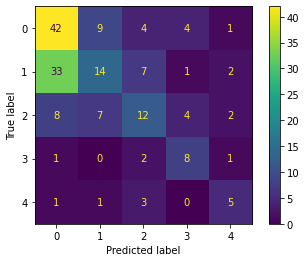

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
disp.plot()
plt.show()

#### ROC curve

Area under ROC Curve

In [15]:
roc_auc_score(y_test, model.predict_proba(X_test_scaled), multi_class = 'ovo')

0.8115156166932482

One hot encoder for ROC curve purpose

In [16]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
y_test = ohe.fit_transform(y_test.values.reshape(-1,1))
y_pred = ohe.fit_transform(y_pred.reshape(-1,1))

Plot of ROC curve

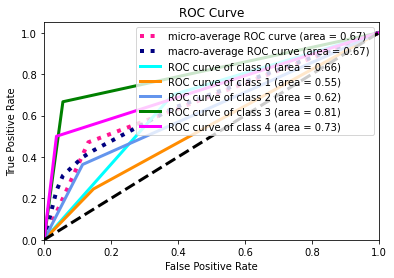

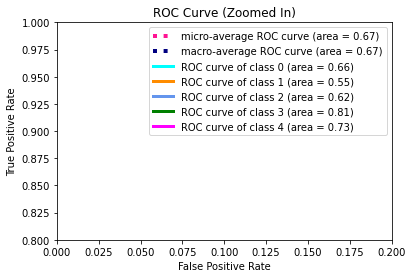

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from numpy import interp
from itertools import cycle

n_classes = 5

# Plot linewidth.
lw = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'magenta'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="upper right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Zoomed In)')
plt.legend(loc="upper right")
plt.show()